# Some ML algoritms applied to classification problems.

Here, we want a model to automatically classify observations according to some finite set of classes. For example, if we wanto to classify e-mails as spam or not spam, our finite set of possibilities is {'spam', 'not_spam'}.

The k-NN algorithm applied to the breast cancer Wisconsin dataset.
--
The objective here is to train a model that is able to classify tumors into benign or malign with as high accuracy as possible.
For training this model, I'll be using the 10 features extracted from digitized images os breast cancer. Source.:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [26]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)

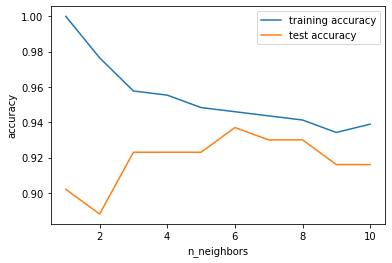

In [28]:
training_accuracy = []
test_accuracy = []

neighbors_range = range(1,11)

for n_neighbors in neighbors_range:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_range, training_accuracy, label="training accuracy")
plt.plot(neighbors_range, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend();

The above image illustrates the bias–variance tradeoff. In k-NN algorithm, we can use the number of neighbors (k) to control this trade-off.
For lower valurs of k, we induce high variance models (higher complex models). Otherwise, we can induce low variance models (or high bias models)
setting k to higher values. The objective here is to find balance between bias and variance. As we can observe, this "sweet point" is found with k=6.